In [11]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")

In [37]:
# Load the dataset

df = pd.read_csv(r"C:\\Users\\91984\\Downloads\\automobile_performance.csv")
df.head()

,fuel_efficiency,engine_config,engine_volume,power_output,vehicle_mass,accel_capability,release_year,manufacture_region
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [19]:
df.shape

(398, 8)

In [20]:
print("\nDataset Info:\n")
print(df.info())


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fuel_efficiency     398 non-null    float64
 1   engine_config       398 non-null    int64  
 2   engine_volume       398 non-null    float64
 3   power_output        398 non-null    object 
 4   vehicle_mass        398 non-null    int64  
 5   accel_capability    398 non-null    float64
 6   release_year        398 non-null    int64  
 7   manufacture_region  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB
None


In [21]:
df.isnull().sum()

fuel_efficiency       0
engine_config         0
engine_volume         0
power_output          0
vehicle_mass          0
accel_capability      0
release_year          0
manufacture_region    0
dtype: int64

In [22]:
df.duplicated().sum()

0

In [36]:
# engine_config and manufacture_region are categorical

label_enc = LabelEncoder()
df["engine_config"] = label_enc.fit_transform(df["engine_config"])
df["manufacture_region"] = label_enc.fit_transform(df["manufacture_region"])

In [35]:
# Feature Scaling

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop("fuel_efficiency", axis=1))
X = pd.DataFrame(scaled_features, columns=df.drop("fuel_efficiency", axis=1).columns)
y = df["fuel_efficiency"]

In [34]:
# Outlier Detection (Z-score method)

from scipy import stats
z_scores = np.abs(stats.zscore(X))
X = X[(z_scores < 3).all(axis=1)]
y = y[X.index]

print("\nShape after outlier removal:", X.shape)


Shape after outlier removal: (384, 7)


In [32]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# Train Models

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {"RMSE": rmse, "MAE": mae, "R²": r2}

    print(f"\n{name} Performance:")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}")
    print(f"R² Score: {r2:.3f}")


Linear Regression Performance:
RMSE: 3.201
MAE: 2.454
R² Score: 0.804

Decision Tree Performance:
RMSE: 3.166
MAE: 2.405
R² Score: 0.808

Gradient Boosting Performance:
RMSE: 2.764
MAE: 2.073
R² Score: 0.854


In [39]:
# Compare Model Performance

results_df = pd.DataFrame(results).T
print("\nModel Comparison:\n", results_df)


Model Comparison:
                        RMSE       MAE        R²
Linear Regression  3.200667  2.454301  0.803736
Decision Tree      3.165758  2.405063  0.807994
Gradient Boosting  2.763708  2.073402  0.853667


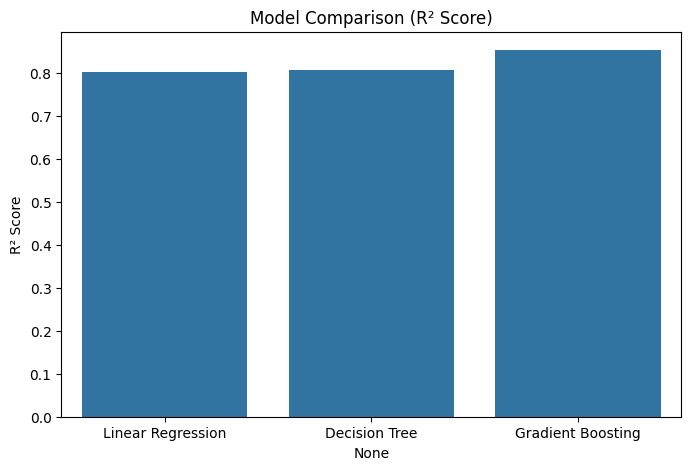

In [40]:
# Visualization

plt.figure(figsize=(8,5))
sns.barplot(x=results_df.index, y=results_df["R²"])
plt.title("Model Comparison (R² Score)")
plt.ylabel("R² Score")
plt.show()

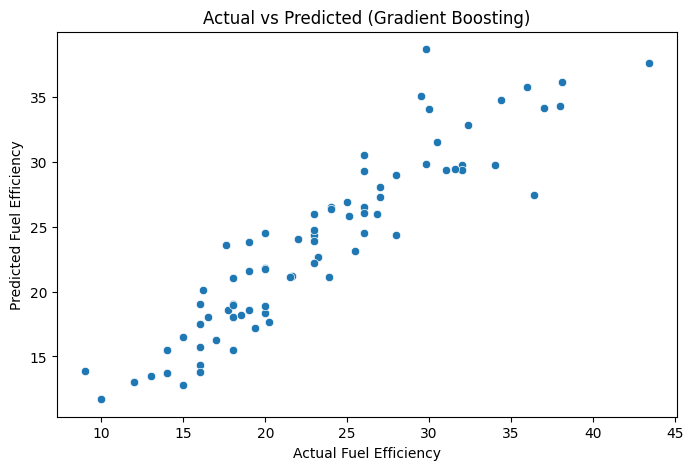

In [42]:
# Error distribution for best model

best_model_name = results_df["R²"].idxmax()
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred_best)
plt.xlabel("Actual Fuel Efficiency")
plt.ylabel("Predicted Fuel Efficiency")
plt.title(f"Actual vs Predicted ({best_model_name})")
plt.show()
